<font color = "brown"><font size = 5> Context </font>
    
<font size = 2> The vehicle insurance industry is not only highly competitive but also heavily reliant on data analytics to make informed decisions. In this case study, we delve into the efforts of "SafeDrive Insurance," a mid-sized vehicle insurance provider, to use data-driven insights for predicting claim losses accurately. SafeDrive Insurance recognizes that accurate prediction of claim losses is crucial for maintaining profitability and sustainable growth in a dynamic market.</font>







<br/>
<font color = "brown" size = 5> Problem Statement </font>

<font size = 2> The data-set aims to answer the following key questions: </font>

*   Does various predicting factors really affect the loss incurred by the insurance company?

*   What are the predicting variables actually affecting the loss incurred by the insurance company?

*   Should a Age factors really affect the losses incurred by insurance company?

*   Do a experience in driving really affect the rate of taking vehicles insurance ?

*   What is the main reason or factor which is really affecting the losses incurred by insurance company?






<br/>
<font color = "brown" size = 5> Data Dictionary </font>



*   Policy_Number: Vehicle Policy Number 
*   Age : Age of a person having a vehicle(years)
*   Years_of_Driving_Experience: This are the experience of the person of driving .
*   Number_of_Vehicles: Number of vehicle own by the person.
*   Gender: Gender of the person.
*   Married: It is the maritial status of the person whether he or she is married or single.
*   Vehicle_Age: It is the age of vehicle having the policy.(years) 
*   Fuel_Type: It shows wheather the vehicle is petrol or diesel.
*   Losses : Losses through insurance policy.









<font color = "brown" size = 5>Lets start coding!</font>

<font color = "brown" size = 5>Importing Libraries</font>

In [1]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
# Reading the input data file
data = pd.read_excel("InsuranceLosses.xlsx")           

In [3]:
# let us make another copy of data
df = data.copy()
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,150024.0,24.0,5.0,1.0,M,Married,11.0,P,203.319595
1,144880.0,31.0,10.0,1.0,F,Single,6.0,P,402.197302
2,133742.0,56.0,37.0,1.0,M,Married,0.0,D,553.132096
3,151282.0,52.0,31.0,1.0,F,Married,15.0,P,292.430579
4,174407.0,20.0,3.0,1.0,M,Single,15.0,P,246.540576


<font color = "blue" size = 4>Checking the numbers of rows and columns</font>

In [4]:
#checking the shape of data
df.shape

(15290, 9)

<font color = "blue" size = 4>Lets have a look at column names</font>

In [2]:
#df.columns

<font color = "blue" size = 4>Checking column type and missing values</font>

In [6]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Policy Number                15290 non-null  float64
 1   Age                          15290 non-null  float64
 2   Years of Driving Experience  15290 non-null  float64
 3   Number of Vehicles           15290 non-null  float64
 4   Gender                       15290 non-null  object 
 5   Married                      15290 non-null  object 
 6   Vehicle Age                  15290 non-null  float64
 7   Fuel Type                    15290 non-null  object 
 8   Losses                       15290 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


<font color = "black" size = 3>Observations</font>



*   There are 15290 rows and 9 columns
*   Column names have spaces which we would fix
*   There are three independent object variable, five numerical independent variable and dependent variable is of float type.






<font color = "blue" size = 4>Column name has some spaces so lets fix them</font>

In [8]:
df.columns = [col.replace(' ','_') for col in df.columns]    

<font color = "blue" size = 4>Lets check the null values</font>

In [9]:
df.isna().sum()

Policy_Number                  0
Age                            0
Years_of_Driving_Experience    0
Number_of_Vehicles             0
Gender                         0
Married                        0
Vehicle_Age                    0
Fuel_Type                      0
Losses                         0
dtype: int64

<font color = "black" size = 4>Observation</font>
 We can see that there are no null values in this data set

<font color = "blue" size = 4>Checking the unique values</font>

In [10]:
# Check the unique values in each column of the dataframe.
df.nunique()

Policy_Number                  15290
Age                               55
Years_of_Driving_Experience       54
Number_of_Vehicles                 4
Gender                             2
Married                            2
Vehicle_Age                       16
Fuel_Type                          2
Losses                         15289
dtype: int64

<br/>
<font color = "brown" size = 5>Statistical Summary</font>

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Policy_Number,15290.000,NaN,NaN,NaN,149961.789,28947.841,100002.000,124900.500,149897.500,175019.500,200454.000
Age,15290.000,NaN,NaN,NaN,42.328,18.281,16.000,24.000,42.000,61.000,70.000
Years_of_Driving_Experience,15290.000,NaN,NaN,NaN,23.733,17.851,0.000,6.000,23.000,42.000,53.000
Number_of_Vehicles,15290.000,NaN,NaN,NaN,2.496,0.954,1.000,2.000,2.000,3.000,4.000
Gender,15290,2,F,7747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,15290,2,Married,7783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Age,15290.000,NaN,NaN,NaN,8.656,4.345,0.000,6.000,9.000,12.000,15.000
Fuel_Type,15290,2,P,11670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Losses,15290.000,NaN,NaN,NaN,389.860,253.729,12.535,226.434,354.938,488.677,3500.000


<font size =3> Insights: </font>
 
*   The "Gender" column has 2 unique values. i.e. The values are "Male" and "Female"
*   Age starts from 16 to 70
*   Average of Losses is 354.938









In [12]:
df.describe(include='object').T

,count,unique,top,freq
Gender,15290,2,F,7747
Married,15290,2,Married,7783
Fuel_Type,15290,2,P,11670


<br/>
<font color = "brown" size = 5>Exploratory Data Analysis</font>

<font color = "blue" size = 4>Univariate analysis</font>

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# <font color = "blue"><font size = 5>Lets explore dependent variable </font>

In [14]:
# We do not require Policy_Number column so we can drop it
df=df.drop("Policy_Number",axis=1)

In [15]:
df.shape

(15290, 8)

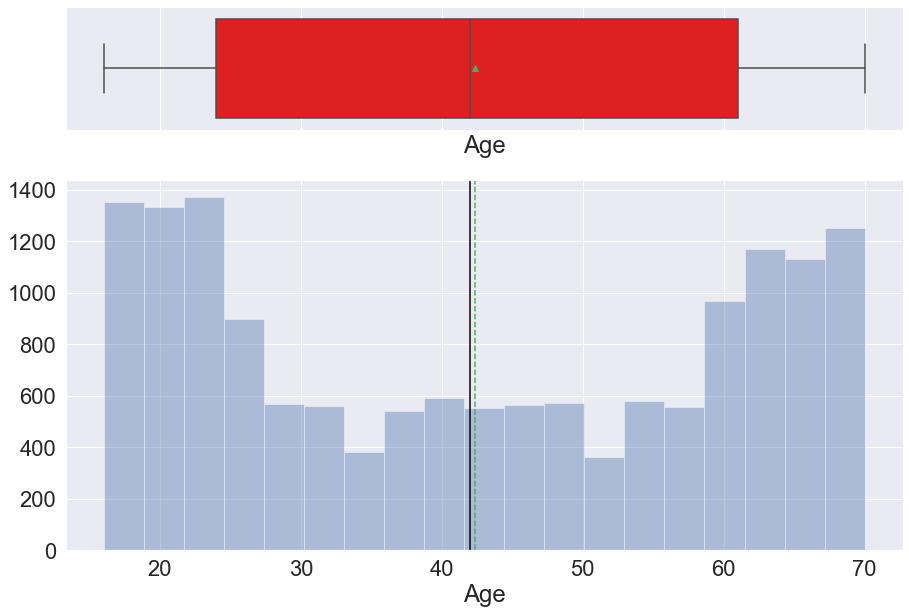

In [16]:
histogram_boxplot(df.Age)

<font size = 3>Observation </font>

*   As we can see that the people from Age between 20 to 30 and 60 to 70 are those  who take the policy more than the people from Age between 30 to 60
*   Average Age is around 42 years





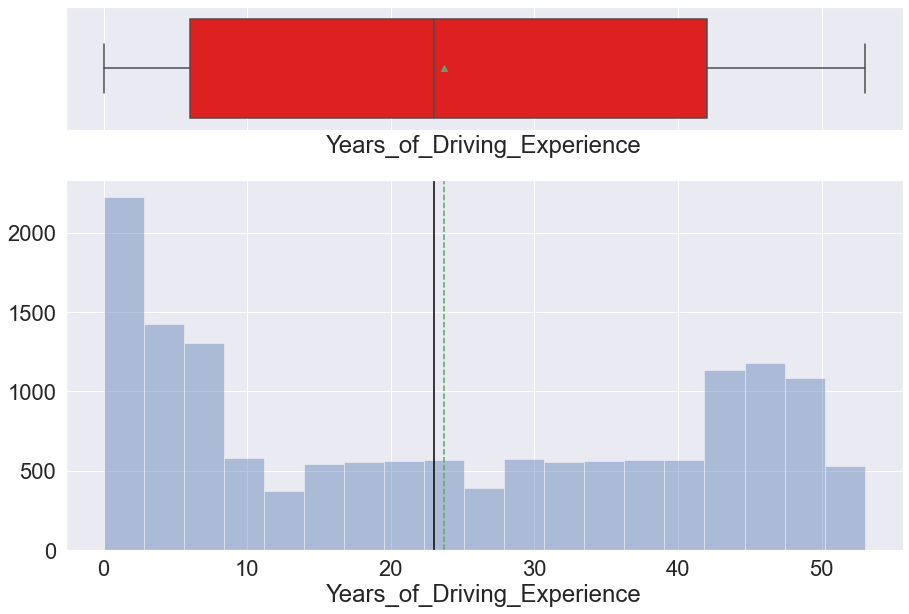

In [17]:
histogram_boxplot(df.Years_of_Driving_Experience)

<font size = 3>Observation </font>



*   There are around 3500 owners who have the experience of driving the vehicle between 40 to 50 years .
* But about 5000 owners have the Years_of_Driving_Experience less than 10 years.
*  Average Years_of_Driving_Experience is aounr 20 years.



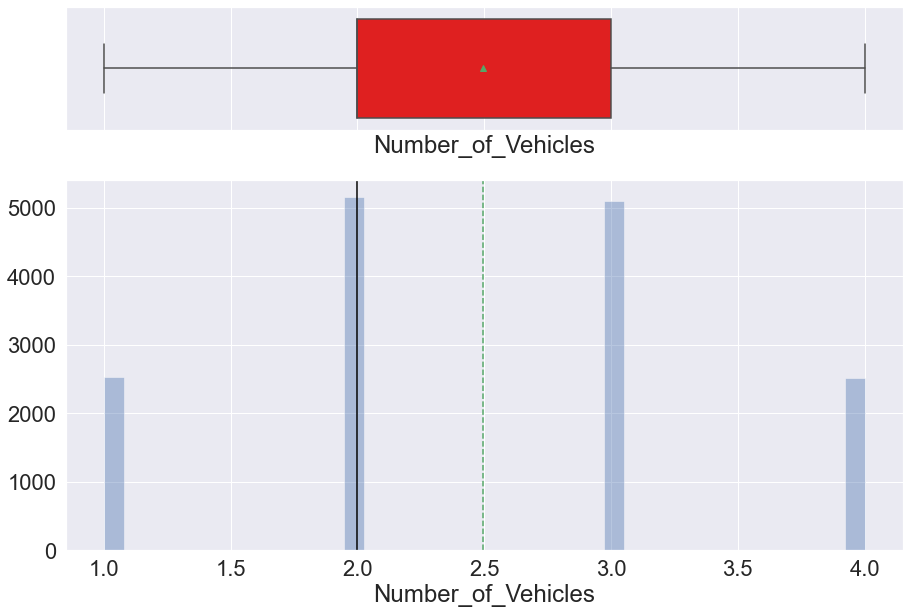

In [18]:
histogram_boxplot(df.Number_of_Vehicles)

<font size = 3>Observation </font>
*   From the above graph we can see that most of the owner have 2 or 3 Vehicles.



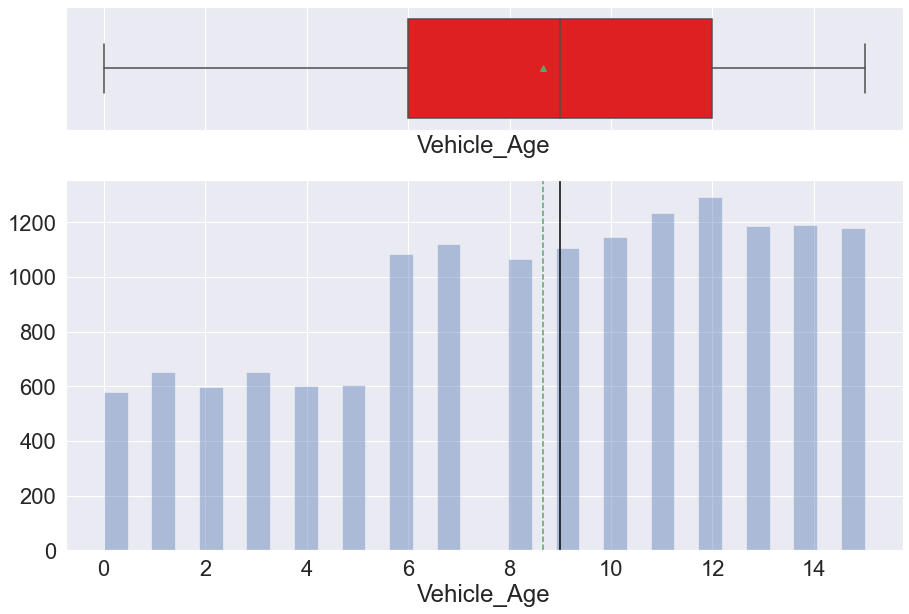

In [19]:
histogram_boxplot(df.Vehicle_Age)

<font size = 3>Observation </font>
* There are around 10000 vehicles which are between 6 to 14 years old
* Around 5000 vehicles are between 0 to 5 years old .




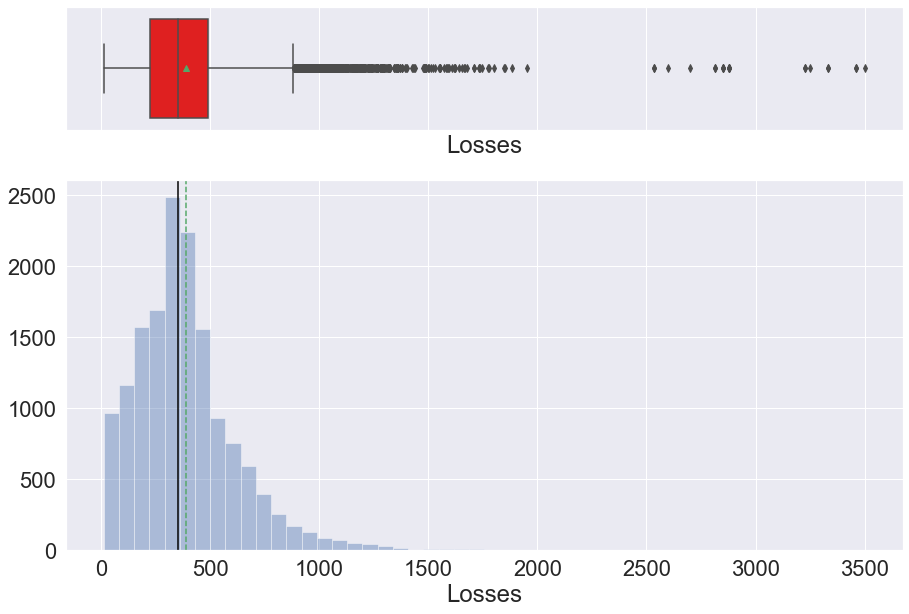

In [20]:
histogram_boxplot(df.Losses)

<font size = 3>Observation </font>
*  From the above graph we can see that around 2500 have recieved a benefit amount of 500. 
* There are outlier values in our dependent variable
* We will perform Log transformation on "Losses" column.



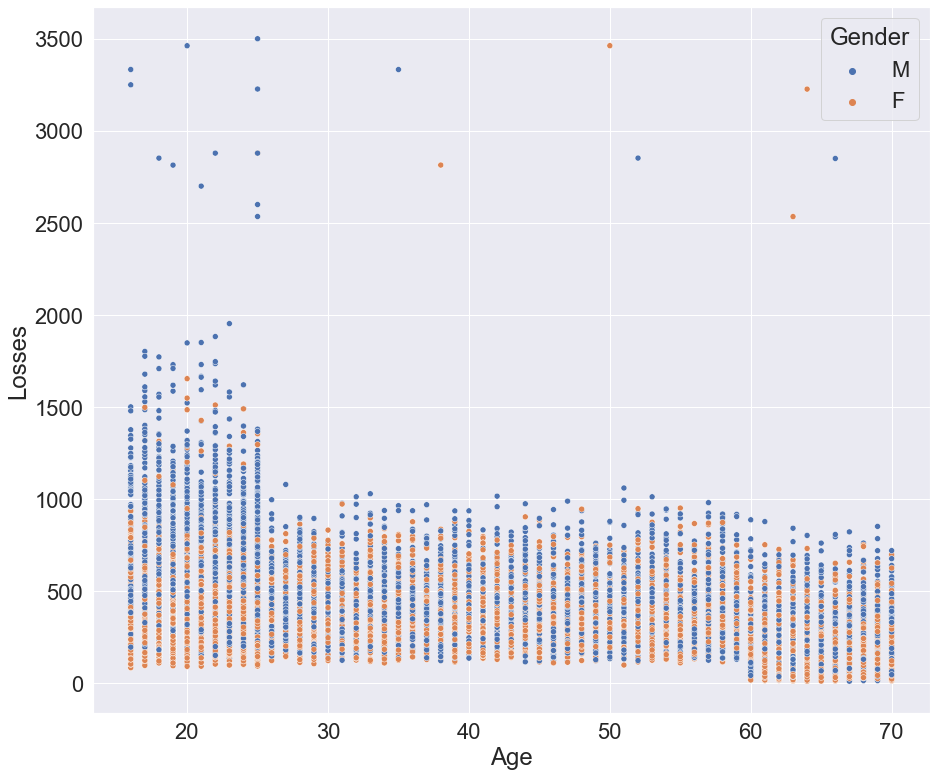

In [21]:
# It is the graph of Losses vs Age vs Gender
plt.figure(figsize=(15,13))
sns.scatterplot(y='Losses', x='Age', hue='Gender', data=df);

<font size = 3>Observation </font>
* As we can see from the above graph that the most of  the losses incurred by the insurance company is from policy holders between the Age 20 to 25 .

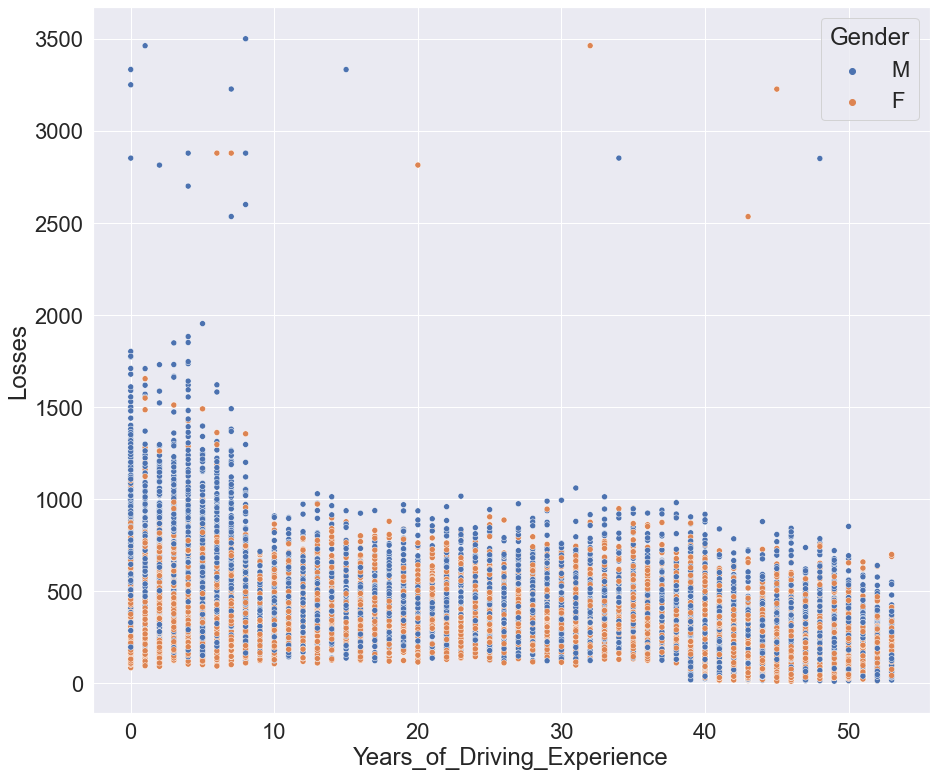

In [22]:
# It is the graph of Losses vs Years of Driving Experience vs Gender
plt.figure(figsize=(15,13))
sns.scatterplot(y='Losses', x='Years_of_Driving_Experience', hue='Gender', data=df);

<font size = 3>Observation </font>
* Years_of_Driving_Experience graph shows that the insurance company suffers more Losses from the less experienced drivers.


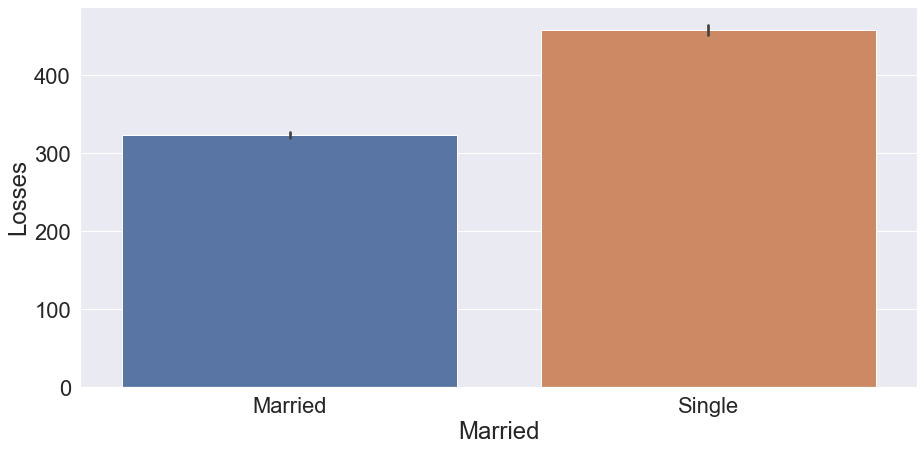

In [23]:
# it is the bargraph between Married vs Losses
plt.figure(figsize=(15,7))
sns.barplot(x='Married', y='Losses',
             data=df);

<font size = 3>Observation</font>
* Policy holders with maritial status as single tend to claim more benefit amount.




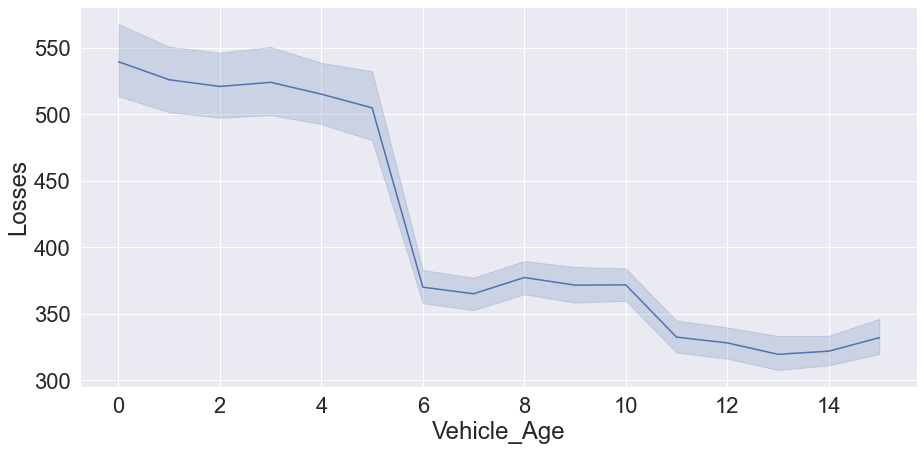

In [24]:
# It is the graph between Vehicle Age vs Losses
plt.figure(figsize=(15,7))
sns.lineplot(x='Vehicle_Age', y='Losses',
             data=df);

<font size = 3>Observation</font>
* As the vehicle gets old the benefit amount that the policy holder can avail gets reduced.

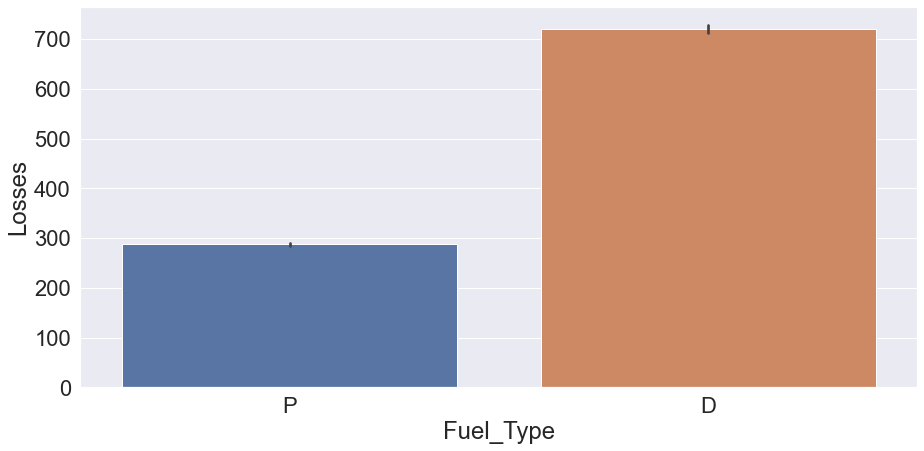

In [25]:
# It is the graph of Losses vs Fuel Type
plt.figure(figsize=(15,7))
sns.barplot(x='Fuel_Type', y='Losses',
             data=df);

<font size = 3>Observation</font>
* Policy holders who have vehicle with "Fuel_Type" as "D" tend to claim more benefit amount.
* Company faces more losses through the Policy holders who have vehicle with "Fuel_Type" as "D".


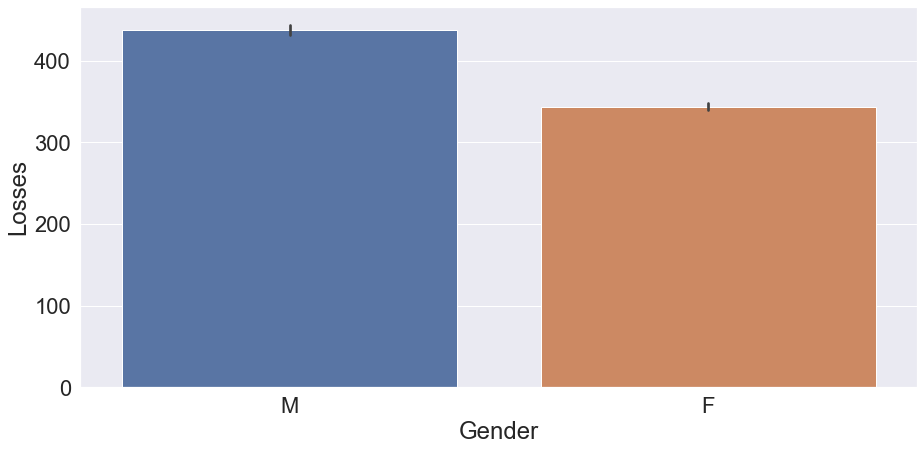

In [26]:
# It is the graph of Losses vs Gender
plt.figure(figsize=(15,7))
sns.barplot(x='Gender', y='Losses',
             data=df);

<font size = 3>Observation</font>
* Company faces more loss from Male policy holders who tend to claim more benefit amount than the Female policy holders.

<font color = "blue" size = 4>Distribution of each numerical column </font>

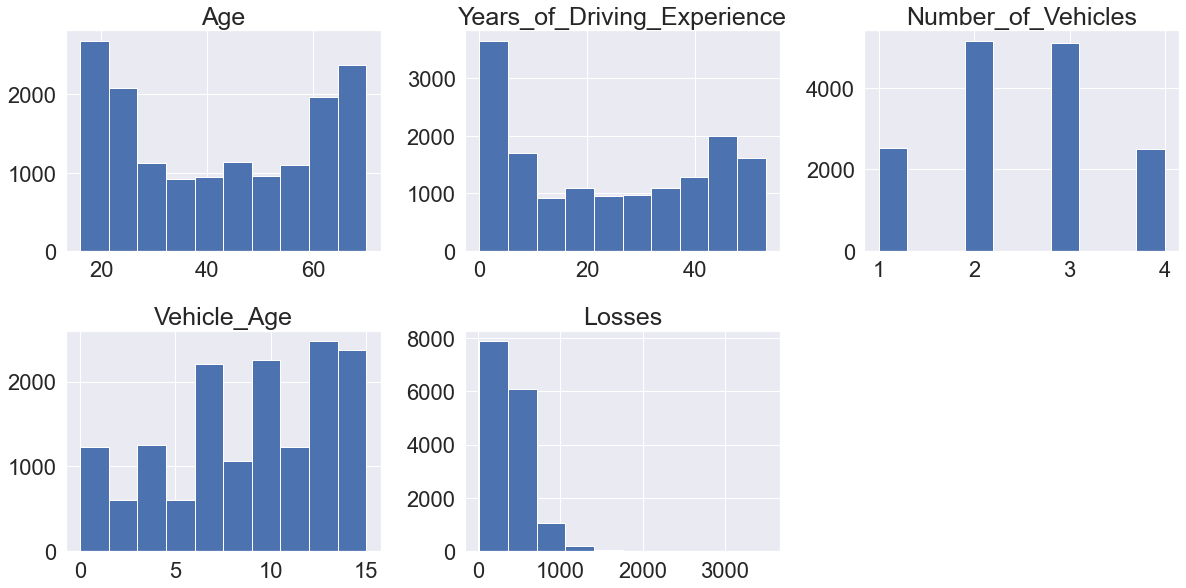

In [28]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

# <font color = "black"><font size = 5>Observation</font>
   

*   From the Age graph we can see that the people from the Age group of 20 and 60 have  more losses compare to that of from the Age group 40.
*   Years_of_Driving_Experience graph shows that the less experience driver are incurred more losses.
* In the Number_of_vehicle graph we can see that average people have 2 to 3 vehicle.
* From the Vehicle_Age graph we can see that most of the vehicle Age are greater than 10 years. 


<font color = "blue" size = 4>Lets look at outliers of every numerical column </font>

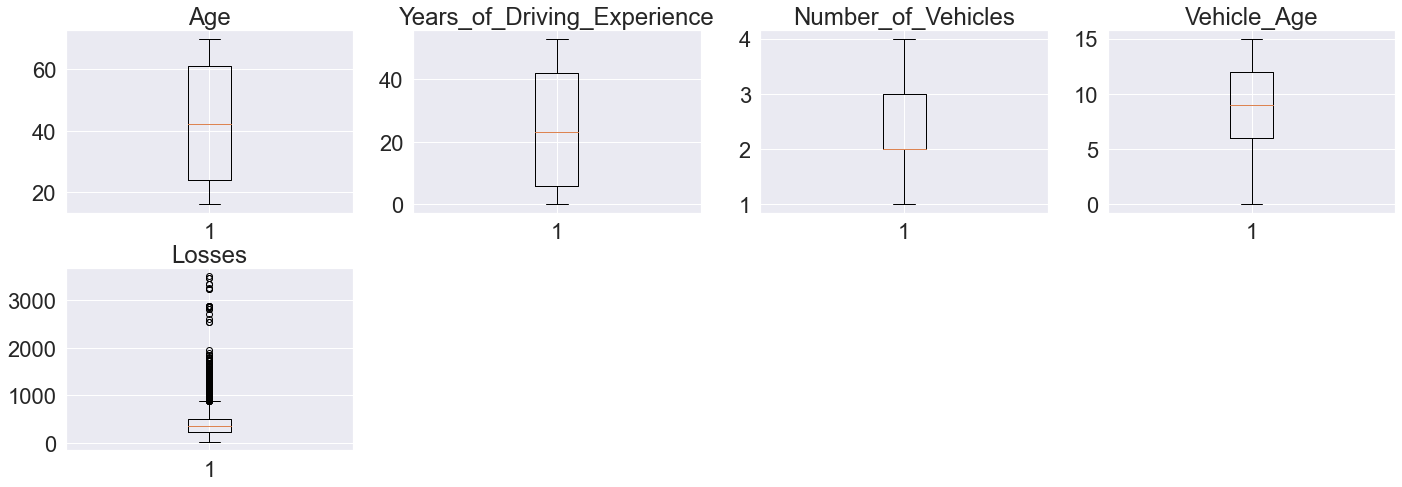

In [30]:
#outlier detection using boxplot
plt.figure(figsize=(20,30))
for i ,variable in enumerate(all_col):
  plt.subplot(9,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

<font size = 3> Observations </font>
*   From above we can see that  losses column has outlier .
*   The losses column has upper outliers


We will treat these outliers as these might adversely affect the predictive power of linear model however in real life these outliers may be due to non-linear pattern in the data set or can be important information. Some time outliers in the independent variable can be adversely impact the linear model, this we can come to know by building model with and with outliers and comparing the model performances.

<font color = "blue" size = 4>Correlation </font>

In [31]:
correlation = df.corr()
correlation

,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Losses
Age,1.000,0.997,0.008,-0.244,-0.443
Years_of_Driving_Experience,0.997,1.000,0.009,-0.238,-0.442
Number_of_Vehicles,0.008,0.009,1.000,0.006,-0.012
Vehicle_Age,-0.244,-0.238,0.006,1.000,-0.275
Losses,-0.443,-0.442,-0.012,-0.275,1.000


<AxesSubplot:>

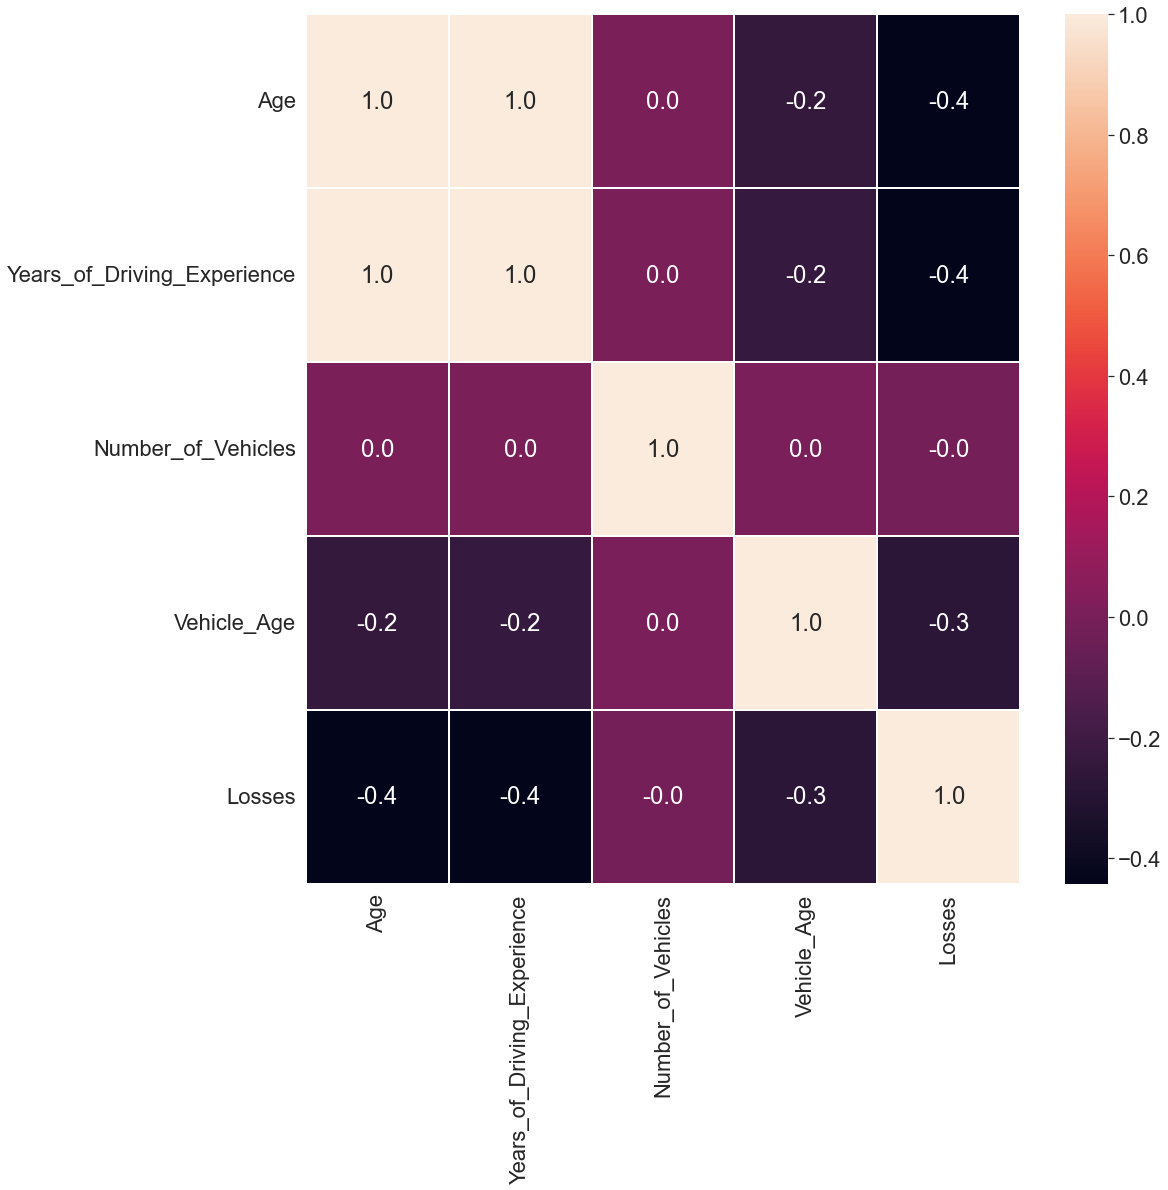

In [32]:
#correlation map
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '1.0001f',ax=ax)

<font color = "black" size = 3>Observation </font>
* From this we can see that age and years of driving experience are mostly correlated to each other.

<font color = "brown" size = 5>Data preparation </font>



*  Performing Log Transformation on Dependent variable.
*  This is done to make the data in the column more interpretable.

In [33]:
df['Losses_norm']= np.log(df['Losses'])

Adding new column to the dataframe of name Vehicle_Age_Category.

In [36]:
conditions = [
(df["Vehicle_Age"] <=6),
(df["Vehicle_Age"] >=7) & (df["Vehicle_Age"] <12),
(df["Vehicle_Age"] >=12)  & (df["Vehicle_Age"] <=15)]
values = ['New' ,'used' , 'old']



In [37]:
df["Vehicle_Age_Category"] = np.select(conditions, values)

In [38]:
df.Vehicle_Age_Category.value_counts()

used    5673
old     4847
New     4770
Name: Vehicle_Age_Category, dtype: int64

<br/>
<font color = "brown" size = 5>Model Building </font>

In [39]:
df.head()

,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses,Losses_norm,Vehicle_Age_Category
0,24.000,5.000,1.000,M,Married,11.000,P,203.320,5.315,used
1,31.000,10.000,1.000,F,Single,6.000,P,402.197,5.997,New
2,56.000,37.000,1.000,M,Married,0.000,D,553.132,6.316,New
3,52.000,31.000,1.000,F,Married,15.000,P,292.431,5.678,old
4,20.000,3.000,1.000,M,Single,15.000,P,246.541,5.508,old


In [40]:
# creating Dependant and independant variables
x=df.drop(["Losses_norm","Losses"],axis=1)
y=df[["Losses_norm"]]

print(x.head())
print(y.head())

     Age  Years_of_Driving_Experience  Number_of_Vehicles Gender  Married  \
0 24.000                        5.000               1.000      M  Married   
1 31.000                       10.000               1.000      F   Single   
2 56.000                       37.000               1.000      M  Married   
3 52.000                       31.000               1.000      F  Married   
4 20.000                        3.000               1.000      M   Single   

   Vehicle_Age Fuel_Type Vehicle_Age_Category  
0       11.000         P                 used  
1        6.000         P                  New  
2        0.000         D                  New  
3       15.000         P                  old  
4       15.000         P                  old  
   Losses_norm
0        5.315
1        5.997
2        6.316
3        5.678
4        5.508


In [41]:
print(x.shape)
print(y.shape)

(15290, 8)
(15290, 1)


<font color = "blue" size = 4>Creating dummies for object columns </font>


Categorical value cannot be read so we have to convert them in the numeric form so the algorithm can process the data properly



In [43]:
#making dummies for those columns which having descrete values
x = pd.get_dummies(x, columns=["Gender", "Married", "Fuel_Type", "Vehicle_Age_Category"], drop_first = True)
x.head()

,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Gender_M,Married_Single,Fuel_Type_P,Vehicle_Age_Category_old,Vehicle_Age_Category_used
0,24.000,5.000,1.000,11.000,1,0,1,0,1
1,31.000,10.000,1.000,6.000,0,1,1,0,0
2,56.000,37.000,1.000,0.000,1,0,0,0,0
3,52.000,31.000,1.000,15.000,0,0,1,1,0
4,20.000,3.000,1.000,15.000,1,1,1,1,0


In [44]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
X_train.head()

,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Gender_M,Married_Single,Fuel_Type_P,Vehicle_Age_Category_old,Vehicle_Age_Category_used
8625,50.000,32.000,3.000,11.000,0,1,1,0,1
8402,49.000,31.000,3.000,7.000,0,1,1,0,1
2464,23.000,4.000,1.000,7.000,0,1,1,0,1
4896,55.000,37.000,2.000,7.000,0,1,1,0,1
6341,48.000,28.000,2.000,6.000,1,1,1,0,0


<br/>
<font color = "brown" size = 5>Model Building </font>

In [46]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)  

LinearRegression()

In [54]:
print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_train)

Intercept of the linear equation: [6.88294718]

Coefficients of the equation are: [[-0.00425365 -0.01485671  0.00257824 -0.03434687  0.12592423  0.20648201
  -0.57908474 -0.1170522   0.00712434]]


<font color = "blue" size = 4>Model performances </font>

In [55]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [57]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(linearregression, X_train, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.495,0.358,0.543,0.543,NaN


In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(linearregression, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.494,0.357,0.551,0.550,NaN





*   R^2 (coefficient of determination) regression score function.
*   Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


*   R^2 value is 0.55 which means that in this model independent variables are able to explain 55% of variances in dependent variable







<font color = "brown" size = 5>Conclusion </font>

The Training and testing scores are around 55% and both scores are comparable.

R2_score is 0.55, that explains 55% of total variation in the dataset. So, overall the model is not good enough.

<font color = "brown" size = 5>Linear Regression using stats model </font>

Here is the complete syntax to perform the linear regression in Python using statsmodels.
Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [59]:
# Lets us build linear regression model using statsmodel 

x = sm.add_constant(x)
x_train1, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, x_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_norm   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1412.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:07:31   Log-Likelihood:                -7664.4
No. Observations:               10703   AIC:                         1.535e+04
Df Residuals:                   10693   BIC:                         1.542e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<font color = "blue" size = 4>Observation </font>

P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
Negative values of coefficient shows that, Life expectancy deceases with their increase.
Positive values of coefficient shows that, Life expectancy inceases with their increase.
But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values

<font color = "blue" size = 4>Interpreting the Regression Results </font>



1   Adjusted. R-squared: It reflects the fit of the model.



*   R-squared values range from 0 to 1, where a higher value generally
   indicates a better fit, assuming certain conditions are met.
* In our case, the value for Adj. R-squared is 0.55, which is okay!



2   Const coefficient is the Y-intercept.

*   It means that if all the dependent variables (features: like age, fuel, year of driving experiance and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.






3   Std err: It reflects the level of accuracy of the coefficients.



*   The lower it is, the higher is the level of accuracy.



4    P >|t|: It is p-value
*   Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis

    Ho : Independent feature is not significant

    Ha : Independent feature is that it is significant



*   Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level

*   A p-value of less than 0.05 is considered to be statistically significant.








<br/>
<font color = "brown" size = 5>Test of Multicolinearity </font>

*   Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.
*   There are different ways of detecting(or testing) multi-collinearity, one such way is Variation Inflation Factor.
*   Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βkis “inflated”by the existence of correlation among the predictor variables in the model.
*   General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.




In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(x.values,i) for i in range(x.shape[1])],index=x.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

NameError: name 'pd' is not defined

<font size = 3>Observation  </font>
*   Age and Years of driving Experience have a VIF score of much greater than 5

<font color = "blue" size = 4>Removing Multicollinearity </font>

*   Drop every column one by one, that has VIF score greater than 5.
*   Look at the adjusted R square of all these models.
*   Drop the Variable that has highest VIF.
*   Check the VIF Scores again.
*   Continue till you get all VIF scores under 5.






In [61]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train2 = x_train1.drop('Age', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                         20.329
Years_of_Driving_Experience    1.325
Number_of_Vehicles             1.000
Vehicle_Age                    7.742
Gender_M                       1.038
Married_Single                 1.078
Fuel_Type_P                    1.517
Vehicle_Age_Category_old      10.363
Vehicle_Age_Category_used      4.483
dtype: float64



<font size = 3>Observation  </font>
*   Vehicle_Age have a VIF score of greater than 5 ,so lets drop it.

In [62]:
# we drop the one with the highest vif values and check the multicolinearity again
x_train3 = x_train2.drop('Vehicle_Age', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(x_train3.values,i) for i in range(x_train3.shape[1])],index=x_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                         16.235
Years_of_Driving_Experience    1.301
Number_of_Vehicles             1.000
Gender_M                       1.037
Married_Single                 1.076
Fuel_Type_P                    1.480
Vehicle_Age_Category_old       1.730
Vehicle_Age_Category_used      1.601
dtype: float64



<font size = 3>Observation</font>

Since all the VIF values are below 5. Lets us now try check for the R2 and Adjusted R2

In [63]:
olsmod1 = sm.OLS(y_train, x_train3)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_norm   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1776.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:17:22   Log-Likelihood:                -7726.9
No. Observations:               10703   AIC:                         1.547e+04
Df Residuals:                   10695   BIC:                         1.553e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<font size = 3>Observation</font>
*   After treating Multicollinearity R-squared is  0.53 which is not good enough.
*   Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance



<font size = 4 color = "blue"> Significance Test </font>

<font size = 3>Let's drop the variable 'Number_of _Vehicles', since it has highest p value among all with p value greater than 0.05</font>

In [64]:
x_train4 = x_train3.drop(['Number_of_Vehicles'], axis=1)

In [65]:
olsmod3 = sm.OLS(y_train, x_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:            Losses_norm   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2073.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:18:32   Log-Likelihood:                -7727.1
No. Observations:               10703   AIC:                         1.547e+04
Df Residuals:                   10696   BIC:                         1.552e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<font size = 3>Observation</font>

Now no feature has p value greater than 0.05, so we'll consider features in X_train4 as the final ones and olsres3 as final model.

*   Now Adjusted R-squared is 0.53, Our model is able to explain 53% of variance.
*   The Adjusted-R squared in Olsres0 it was 53% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.


<font color = "brown" size = 5>Checking the Linear Regression Assumptions </font>

* Linearity of variables
* Normality of error terms
* Homoscedasticity
* Independence of errors from predictor variables

<br/>
<font color = "blue" size = 4>Mean of residual should be zero</font>

In [66]:
residual= olsres3.resid
np.mean(residual)

3.6226692433905415e-16

Mean of residual is close to zero

<font color = "blue" size = 4>Test for Linearity</font> 


**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [67]:
residual=olsres3.resid
fitted=olsres3.fittedvalues #predicted values

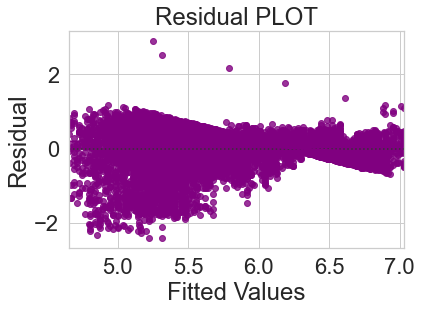

In [68]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.


<br/>
<font color = "blue" size = 4>Test for  Normality</font> 

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

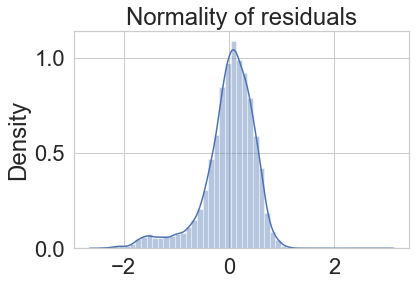

In [69]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line

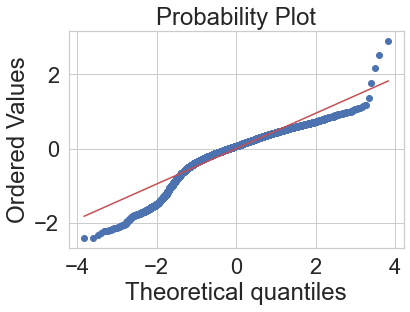

In [70]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [71]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9121925234794617, pvalue=0.0)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

<font color = "blue" size = 4>Test of Homoscedasticity</font>

* Test - goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [72]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train3)
lzip(name, test)

[('F statistic', 0.9835348203890559), ('p-value', 0.7279990954839077)]

<font size = 3>Observation</font>

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

c

<font color = "blue" size = 4>Predicting on the test data</font>

In [73]:
x_train4.columns

Index(['const', 'Years_of_Driving_Experience', 'Gender_M', 'Married_Single',
       'Fuel_Type_P', 'Vehicle_Age_Category_old', 'Vehicle_Age_Category_used'],
      dtype='object')

* Selecting columns from test data that we used to create our final model

In [74]:
x_test_final = x_test[x_train4.columns]

In [75]:
x_test_final.head()

,const,Years_of_Driving_Experience,Gender_M,Married_Single,Fuel_Type_P,Vehicle_Age_Category_old,Vehicle_Age_Category_used
3522,1.000,7.000,1,0,1,0,1
12365,1.000,24.000,1,1,0,0,1
895,1.000,48.000,1,0,1,1,0
2310,1.000,0.000,0,0,1,0,1
8747,1.000,13.000,1,1,0,0,0


In [76]:
y_pred = olsres3.predict(x_test_final)

<br/>
<font color = "blue" size = 5>Checking the performance on train and test</font>

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
sklmodel_train_perf = model_performance_regression(olsres3, x_train4, y_train)
sklmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.498,0.360,0.538,0.537,NaN


In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsres3, x_test_final, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.498,0.360,0.544,0.543,NaN


<font color = "brown" size = 5>Conclusion </font>

* Now this is our final model which follows all the assumptions and this can be used for interpretations
* After building the model and analyzing it we can say that the Years_of _Driving_Experience is the main factor which affect the insurance losses rate.
* Age is the second factor which affect the losses incurred by the insurance company according to the result.
 
